In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1 = df.drop(['area_type','availability','society','balcony'],axis='columns')

In [4]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df1.shape

(13320, 5)

In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2=df1.dropna()
df2.shape

(13246, 5)

In [8]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2['BHK'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\DELL\AppData\Local\Temp/ipykernel_6364/2015094411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


In [11]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df2[df2['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [16]:
def to_convert_range_into_float(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(to_convert_range_into_float)

In [18]:
df3.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [19]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK


In [20]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df3['Price_per_sqft'] = (df3['price']*100000)/df3['total_sqft']

In [22]:
df3.head()

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
location_stats = df3.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [24]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Kamakshipalya            9
Kaverappa Layout         9
Yemlur                   9
Sector 1 HSR Layout      9
4th Block Koramangala    9
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1051, dtype: int64

In [25]:
df3.location = df3.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [26]:
df3[df3.total_sqft/df3.BHK<300]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [27]:
df3.shape

(13246, 7)

In [28]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]

In [29]:
df4.shape

(12502, 7)

In [30]:
df4.groupby('location') == '1st Block Jayanagar'

False

In [31]:
df4.head(20)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889


In [32]:
df4.drop('size',axis='columns')

,location,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [33]:
loc = df4.groupby('location')
loc.head()

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
9879,Vishwapriya Layout,5 Bedroom,2800.0,5.0,130.00,5,4642.857143
10120,Shivaji Nagar,3 BHK,1300.0,3.0,170.00,3,13076.923077
10354,5th Block Hbr Layout,2 BHK,1100.0,2.0,48.00,2,4363.636364
11043,Thyagaraja Nagar,7 BHK,3000.0,6.0,180.00,7,6000.000000


In [34]:
df4['location'].count()

12502

In [35]:
df4.count()

location          12502
size              12502
total_sqft        12456
bath              12502
price             12502
BHK               12502
Price_per_sqft    12456
dtype: int64

In [36]:
unique_locations = df4.location.unique


In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf.Price_per_sqft)
        std = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(mean-std)) & (subdf.Price_per_sqft<(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    

In [38]:
df5 = remove_pps_outliers(df4)

In [39]:
df4.shape

(12502, 7)

In [40]:
df5.shape

(10226, 7)

In [41]:
df5

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10221,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10222,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10223,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10224,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [42]:
df5[df5.bath>df5.BHK+2]
df6 = df5[~(df5.bath>df5.BHK+2)]

In [43]:
df5.shape

(10226, 7)

In [44]:
df6.shape

(10221, 7)

In [45]:
df6[df6.bath>df6.BHK+2]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft


In [46]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location)&(df.BHK == 2)]
    bhk3 = df[(df.location == location)&(df.BHK == 3)]
    #matplotlib.rcparams['figure.figuresize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3BHK',s=50)
    plt.xlabel=('Total sqft area')
    plt.ylabel=('Price')
    plt.title('location')
    plt.legend()

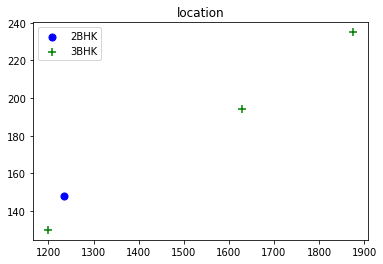

In [47]:
plot_scatter_chart(df6,'1st Block Jayanagar')

In [48]:
df6.head(20)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
6,Devarachikkanahalli,2 BHK,1130.0,2.0,36.0,2,3185.840708
7,Devarachikkanahalli,3 BHK,1417.0,2.0,76.0,3,5363.443896
8,Devarachikkanahalli,2 BHK,1230.0,2.0,58.0,2,4715.447154
9,Devarachikkanahalli,3 BHK,1705.0,3.0,75.0,3,4398.826979


In [49]:
df6.drop(['size','Price_per_sqft'], axis='columns')

,location,total_sqft,bath,price,BHK
0,Devarachikkanahalli,1250.0,2.0,44.00,3
1,Devarachikkanahalli,1250.0,2.0,40.00,2
2,Devarachikkanahalli,1200.0,2.0,83.00,2
3,Devarachikkanahalli,1170.0,2.0,40.00,2
4,Devarachikkanahalli,1425.0,2.0,65.00,3
...,...,...,...,...,...
10221,other,1353.0,2.0,110.00,2
10222,other,812.0,1.0,26.00,1
10223,other,1440.0,2.0,63.93,3
10224,other,1075.0,2.0,48.00,2


In [50]:
dummies = pd.get_dummies(df6.location)

In [51]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df7 = pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')

In [53]:
df7

,location,size,total_sqft,bath,price,BHK,Price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,other,2 BHK,1353.0,2.0,110.00,2,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10223,other,3 BHK,1440.0,2.0,63.93,3,4439.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10224,other,2 BHK,1075.0,2.0,48.00,2,4465.116279,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df8 = df7.drop('location',axis='columns')

In [55]:
df8.head()

,size,total_sqft,bath,price,BHK,Price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3 BHK,1250.0,2.0,44.0,3,3520.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2 BHK,1250.0,2.0,40.0,2,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2 Bedroom,1200.0,2.0,83.0,2,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2 BHK,1170.0,2.0,40.0,2,3418.803419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 BHK,1425.0,2.0,65.0,3,4561.403509,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X = df8.drop(['price','size','Price_per_sqft'],axis='columns', )
X

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10223,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10224,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
y = df8.price
y.count()

10221

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
lr.score(X_test, y_test)


0.7885798765979556

In [93]:
def predict_price(location, sqft, bhk, bathrooms):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bathrooms
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1
    return lr.predict([x])[0]    

In [94]:
predict_price('Vishveshwarya Layout',1100,3,3)

19.574130870956395

In [100]:
lr.score(X_test, y_test)

0.7885798765979556